In [1]:
import yfinance as yf
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
msft = yf.Ticker("MSFT")

In [4]:
msft

AttributeError: 'Ticker' object has no attribute 'head'

In [19]:
apple = yf.download(tickers= 'aapl',auto_adjust=True, period = '3Y')

[*********************100%***********************]  1 of 1 completed


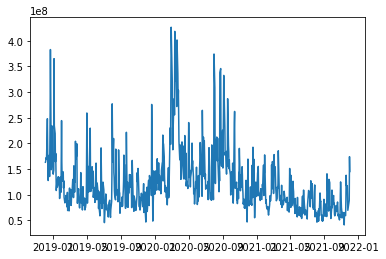

In [26]:
plt.plot(apple.Volume)

In [23]:
apple

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-03,44.767401,44.883893,43.978644,44.854771,163210000
2018-12-04,43.915541,44.265021,42.779733,42.881664,165377200
2018-12-06,41.685180,42.418118,41.359970,42.403557,172393600
2018-12-07,42.105051,42.347745,40.845466,40.891579,169126400
2018-12-10,40.044562,41.279875,39.639263,41.160957,248104000
...,...,...,...,...,...
2021-11-24,160.750000,162.139999,159.639999,161.940002,69463600
2021-11-26,159.570007,160.449997,156.360001,156.809998,76959800
2021-11-29,159.369995,161.190002,158.789993,160.240005,88748200


In [36]:
# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, subplot_titles=('OHLC', 'Volume'), 
               row_width=[0.2, 0.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=apple.index, open=apple["Open"], high=apple["High"],
                low=apple["Low"], close=apple["Close"], name="OHLC"), 
                row=1, col=1
)

# Bar trace for volumes on 2nd row without legend
fig.add_trace(go.Bar(x=apple.index, y=apple['Volume'], showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_xaxes(rangebreaks=[dict(bounds=["sat", "mon"]) ])#hide weekends
    
fig.show()